In [325]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

First we'll merge df1, which has the data on the average price of accomodation by month, with df2, which has the amount of tourists by region by month.

In [326]:
df1 = pd.read_csv("accomodation_data.csv", encoding='iso-8859-1')
df2 = pd.read_csv("tourist_data.csv", encoding='iso-8859-1')

df = df1.merge(df2, on="Kuukausi")
df

,Kuukausi,"Liikkeet, lkm","Huoneet, lkm","Huonekäyttöaste, %",Huoneen keskihinta,"Vuoteet, lkm","Vuodekäyttöaste, %",Yöpymisen keskihinta,Kaikki yhteensä,Suomi,Ulkomaat
0,1995M01,161,5069,28.9,48.45,13290,18.2,28.57,75224,46170,29054
1,1995M02,176,5478,43.2,50.91,14248,33.0,24.96,132014,98064,33950
2,1995M03,184,5582,51.7,55.18,14560,40.2,25.67,187476,145824,41652
3,1995M04,191,5705,51.6,58.24,14924,43.5,24.56,207620,189277,18343
4,1995M05,171,5234,19.4,43.04,13746,12.5,25.19,50650,40813,9837
...,...,...,...,...,...,...,...,...,...,...,...
358,2024M11,175,8684,42.5,185.62,25199,30.8,90.08,225318,66700,158618
359,2024M12,188,9375,77.3,272.62,26794,71.1,106.40,595565,73519,522046
360,2025M01*,187,9410,67.4,230.04,27002,50.3,108.77,426010,64170,361840
361,2025M02*,190,9383,78.0,230.12,26586,60.7,105.18,459793,87034,372759


Next we split the date column into months and years and add to the dataframe.

In [327]:
months = []
years = []

dates = df.iloc[:, [0]].values

for date in dates:
    year = date[0].split('M')[0]
    # Here we have to take the first two characters of the result,
    # due to inconsistent formatting in the data.
    month = date[0].split('M')[1][:2]
    
    months.append(month)
    years.append(int(year))

df["Kuukausi"] = months
df["Vuosi"] = years
df

,Kuukausi,"Liikkeet, lkm","Huoneet, lkm","Huonekäyttöaste, %",Huoneen keskihinta,"Vuoteet, lkm","Vuodekäyttöaste, %",Yöpymisen keskihinta,Kaikki yhteensä,Suomi,Ulkomaat,Vuosi
0,01,161,5069,28.9,48.45,13290,18.2,28.57,75224,46170,29054,1995
1,02,176,5478,43.2,50.91,14248,33.0,24.96,132014,98064,33950,1995
2,03,184,5582,51.7,55.18,14560,40.2,25.67,187476,145824,41652,1995
3,04,191,5705,51.6,58.24,14924,43.5,24.56,207620,189277,18343,1995
4,05,171,5234,19.4,43.04,13746,12.5,25.19,50650,40813,9837,1995
...,...,...,...,...,...,...,...,...,...,...,...,...
358,11,175,8684,42.5,185.62,25199,30.8,90.08,225318,66700,158618,2024
359,12,188,9375,77.3,272.62,26794,71.1,106.40,595565,73519,522046,2024
360,01,187,9410,67.4,230.04,27002,50.3,108.77,426010,64170,361840,2025
361,02,190,9383,78.0,230.12,26586,60.7,105.18,459793,87034,372759,2025


Visualizing the correlation of the amount of overnight stays with the average price of accomodation by month.

In [328]:
def get_price_to_stays(year):

    data = df.loc[df["Vuosi"] == year]

    fig, ax1 = plt.subplots()

    sns.barplot(y="Yöpymisen keskihinta", x="Kuukausi",ax=ax1, data=data, color="lightblue", label="Hinta")

    ax2 = ax1.twinx()

    sns.lineplot(x="Kuukausi", y="Ulkomaat", data=data, ax=ax2, color="coral", label="Ulkomaat", marker='o')

    sns.lineplot(x="Kuukausi", y="Suomi", data=data, ax=ax2, color="darkblue", label="Kotimaa", marker='o')

    ax1.set(ylabel='Yöpymisen keskihinta, €', ylim=(0, 110))

    ax2.set(ylabel='Vietetyt yöt', ylim=(0, 600000))

    sns.move_legend(ax1, "upper right", bbox_to_anchor=(0, 0))

    sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 0))

    plt.title(f"Yöpymisen keskihinta verrattuna vietettyihin öihin vuodelta {year}")
    plt.show()

Visualizing the correlation of the usage ratio of rooms to the average accomodation price by month.

In [329]:
def get_price_to_usage(year):
    data = df.loc[df["Vuosi"] == year]

    fig, ax1 = plt.subplots()

    sns.barplot(y="Yöpymisen keskihinta", x="Kuukausi",ax=ax1, data=data, color="lightblue", label="Hinta")

    ax2 = ax1.twinx()

    sns.lineplot(x="Kuukausi", y="Huonekäyttöaste, %", data=data, ax=ax2, color="coral", label="Käyttöaste", marker='o')

    ax1.set(ylabel='Yöpymisen keskihinta, €', ylim=(0, 120))

    ax2.set(ylim=(0, 100))

    sns.move_legend(ax1, "upper right", bbox_to_anchor=(0, 0))

    sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 0))

    plt.title(f"Yöpymisen keskihinta verrattuna huoneiden käyttöasteeseen vuodelta {year}")
    plt.show()

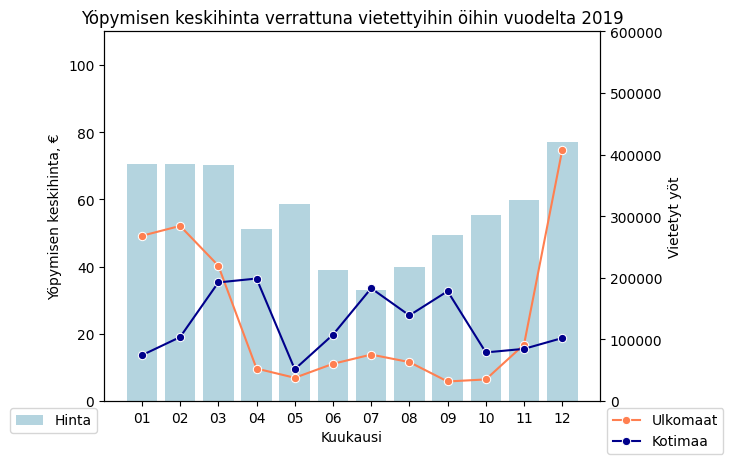

In [330]:
get_price_to_stays(2019)

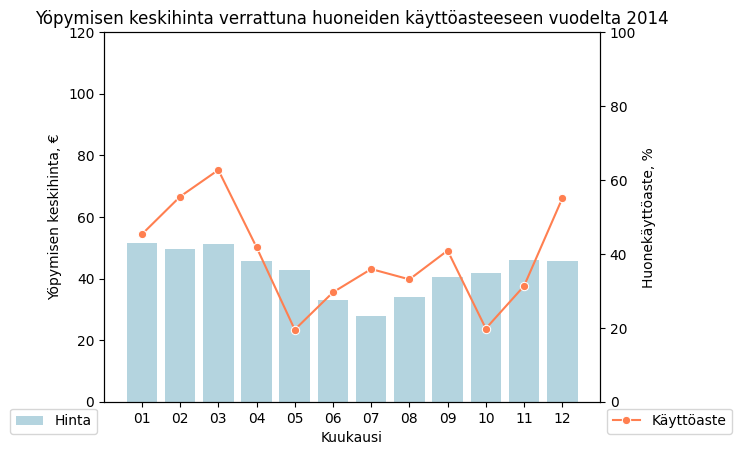

In [343]:
get_price_to_usage(2014)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kuukausi              363 non-null    object 
 1   Liikkeet, lkm         363 non-null    int64  
 2   Huoneet, lkm          363 non-null    int64  
 3   Huonekäyttöaste, %    363 non-null    float64
 4   Huoneen keskihinta    363 non-null    float64
 5   Vuoteet, lkm          363 non-null    int64  
 6   Vuodekäyttöaste, %    363 non-null    float64
 7   Yöpymisen keskihinta  363 non-null    float64
 8   Kaikki yhteensä       363 non-null    int64  
 9   Suomi                 363 non-null    int64  
 10  Ulkomaat              363 non-null    int64  
 11  Vuosi                 363 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.2+ KB


Training a linear regression model to predict average price of accomodation by month.

In [333]:
features = ['Kuukausi', 'Liikkeet, lkm', 'Huoneet, lkm', 'Huonekäyttöaste, %', 'Vuoteet, lkm', 'Vuodekäyttöaste, %', 'Suomi', 'Ulkomaat', 'Vuosi']
label = 'Yöpymisen keskihinta'

X, y = df[features].values, df[label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2_score = model.score(X_test_scaled, y_test)

print(f"Accuracy: {r2_score}")

Accuracy: 0.8064456714578672
